# Feature


In [2]:
import pandas as pd

df = pd.read_csv("../results/performance/ppga_MLPClassifier_feature_toy.csv")
df

,point,features,class,target,classifier,population_size,workers,time,time_std,ptime,ptime_std
0,1,8,1,1,MLPClassifier,1000,1,3.103571,0.107044,2.841035,0.099507
1,1,8,1,1,MLPClassifier,1000,1,2.927841,0.002199,2.673767,0.002437
2,1,4,0,0,MLPClassifier,1000,1,2.932985,0.035264,2.694432,0.035135
3,1,4,0,1,MLPClassifier,1000,1,2.929501,0.001988,2.705016,0.003561
4,1,4,1,0,MLPClassifier,1000,1,2.934819,0.024300,2.718542,0.024233
...,...,...,...,...,...,...,...,...,...,...,...
103,1,64,1,1,MLPClassifier,1000,4,0.843191,0.025508,0.915000,0.005000
104,1,64,0,0,MLPClassifier,1000,4,0.850447,0.027402,0.905000,0.015000
105,1,64,0,1,MLPClassifier,1000,4,0.723321,0.051872,0.965000,0.035000
106,1,16,1,1,MLPClassifier,1000,4,0.583961,0.032424,0.895000,0.015000


In [3]:
df = (
    df.groupby(by=["classifier", "features", "population_size", "workers"])[
        ["time", "time_std", "ptime", "ptime_std"]
    ]
    .mean()
    .reset_index()
)
df

,classifier,features,population_size,workers,time,time_std,ptime,ptime_std
0,MLPClassifier,2,1000,1,2.950096,0.016643,2.730472,0.013636
1,MLPClassifier,2,1000,2,0.395430,0.020505,1.598125,0.016875
2,MLPClassifier,2,1000,4,0.452769,0.018278,0.868125,0.009375
3,MLPClassifier,4,1000,1,2.947280,0.025947,2.714924,0.026293
4,MLPClassifier,4,1000,2,0.415348,0.016050,1.619167,0.029167
5,MLPClassifier,4,1000,4,0.484835,0.020191,0.888333,0.016667
6,MLPClassifier,8,1000,1,2.986618,0.038584,2.727607,0.036199
7,MLPClassifier,8,1000,2,0.453276,0.024672,1.592500,0.012500
8,MLPClassifier,8,1000,4,0.528280,0.021122,0.878750,0.016250
9,MLPClassifier,16,1000,1,2.994448,0.011790,2.697329,0.010088


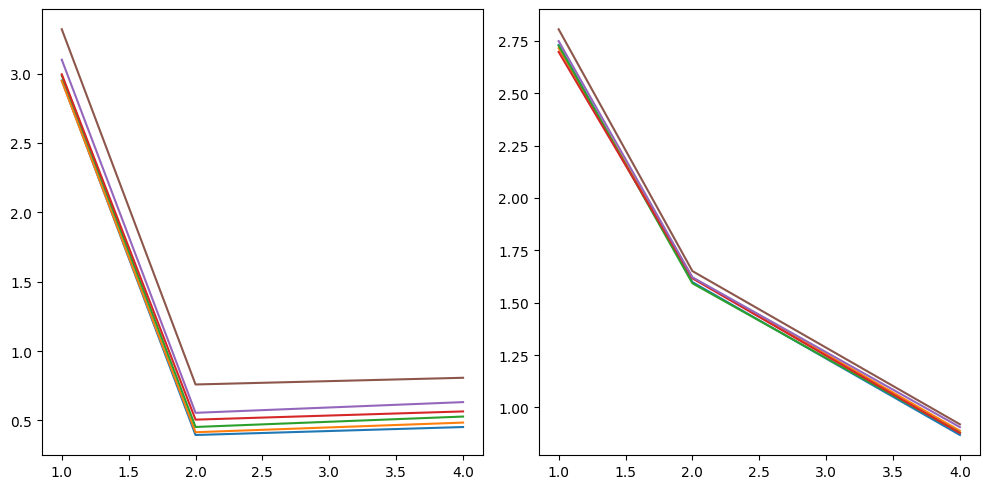

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

features = df["features"].unique()

for f in features:
    mask = df["features"] == f
    w = df[mask]["workers"]
    t = df[mask]["time"]
    axes[0].plot(w, t)

    t = df[mask]["ptime"]
    axes[1].plot(w, t)

plt.tight_layout()
plt.show()